In [0]:

import tensorflow as tf
import cv2 as cv
import os
import numpy as np
import glob
from random import shuffle
from google.colab import drive
import matplotlib.pyplot as plt
import csv

In [2]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folder="/content/drive/My Drive/assign-2/faces94/*/*"
nls=[]
for filename in glob.glob(folder+'/*.jpg'):
  img=cv.imread(filename)
  img=cv.resize(img,(128,128))
  img=img/255
  nls.append(img)

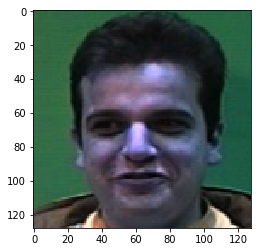

In [4]:
plt.imshow(nls[0])

In [5]:
number_of_images=len(nls)
print(number_of_images)
# plt.imshow(ls[19])
ls=[]
sf=[ii for ii in range(number_of_images)]
shuffle(sf)
print(sf)
for ii in sf:
  ls.append(nls[ii])
tmp=[]
ls=np.asarray(ls, dtype=np.float32)
print(ls.shape)

3059
[344, 906, 556, 1047, 2793, 2676, 689, 2003, 302, 1255, 2962, 1500, 2440, 1691, 1466, 2209, 158, 2488, 455, 773, 2128, 1556, 2664, 618, 953, 3022, 747, 2069, 1672, 1888, 2918, 1974, 818, 1175, 1442, 2335, 2625, 428, 1575, 2366, 2076, 861, 1673, 1058, 1450, 1010, 960, 1609, 159, 934, 2723, 2877, 1314, 2073, 1765, 927, 1877, 911, 434, 2810, 1700, 3050, 1506, 1498, 2624, 20, 1183, 2009, 1634, 711, 357, 1941, 476, 731, 1899, 565, 1470, 1326, 1052, 1258, 2175, 1278, 2439, 1545, 913, 708, 2217, 2973, 2545, 2606, 1562, 2498, 2561, 2407, 959, 484, 1461, 2944, 2869, 1557, 2772, 592, 1266, 1040, 216, 2197, 2338, 77, 371, 2823, 2435, 393, 1467, 2395, 2628, 2857, 2343, 2057, 2808, 2807, 1637, 1050, 2564, 2164, 104, 2506, 2876, 961, 1471, 2544, 2884, 909, 2597, 1992, 625, 604, 1836, 1736, 353, 2837, 1113, 2854, 819, 2811, 1276, 1336, 1892, 725, 1749, 627, 2939, 835, 1840, 2250, 82, 2144, 533, 1709, 1497, 1451, 1966, 505, 1270, 2556, 1844, 421, 2730, 303, 615, 88, 574, 1983, 2887, 1675, 1626, 2

In [0]:
def encoder(x):
    print("hello")

    conv1=tf.layers.conv2d(x,kernel_size=5,strides=1,filters = 32, padding="same",name='layer_conv1')
    conv1=tf.layers.max_pooling2d(conv1,pool_size=[2,2],strides = 2)
    conv1=tf.nn.relu(conv1)
    

    conv2 = tf.layers.conv2d(conv1,kernel_size=5,strides=1,filters = 64, padding="same",name='layer_conv2')
    conv2 = tf.layers.max_pooling2d(conv2,pool_size=[2,2],strides = 2)
    conv2=tf.nn.relu(conv2)
    print("HERE")
    conv3 = tf.layers.conv2d(conv2,kernel_size=5,strides=1,filters = 128, padding="same",name='layer_conv3')
    conv3 = tf.layers.max_pooling2d(conv3,pool_size=[2,2],strides = 2)
    conv3=tf.nn.relu(conv3)
    
#     print(tf.shape(conv3))
    
    fc=tf.reshape(conv3,[-1,16*16*128])
    fc=tf.nn.relu(tf.layers.dense(fc,256))
               
    logit= tf.layers.dense(fc,100)
    prob=tf.nn.sigmoid(logit)
    
    return logit,prob

    
    

In [0]:

def decoder(x):
    logit = tf.nn.relu(tf.layers.dense(x,256))
    
    x = tf.nn.relu(tf.layers.dense(logit,16*16*128))
    
    x = tf.reshape(x,[-1,16,16,128])
    
    upsample1 = tf.image.resize_images(x, size=(32,32), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    conv1 = tf.layers.conv2d(upsample1,filters = 64, kernel_size = 5, strides = 1, padding = 'same')
    
    upsample2 = tf.image.resize_images(conv1, size=(64,64), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    conv2 = tf.layers.conv2d(upsample2,filters = 32, kernel_size = 5, strides = 1, padding = 'same')
    
    upsample3 = tf.image.resize_images(conv2, size=(128,128), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    conv3 = tf.layers.conv2d(upsample3,filters = 3, kernel_size = 5, strides = 1, padding = 'same')
    
    return tf.nn.sigmoid(conv3), conv3
    
    

In [0]:
def train():
  X = tf.placeholder(tf.float32, shape=[None,128,128,3])
  
  encoder_log, encoder_prob= encoder(X)
  decoder_out, decoder_logit = decoder(encoder_prob)

  decoder_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = decoder_logit, labels = X))
  D_optimizer=tf.train.AdamOptimizer(0.001).minimize(decoder_loss)  
  batch_size=64                            
  with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
#         print(sess.run(encoder(ls[0:batch_size])))
        for ep in range(50):
          for j in range(number_of_images//batch_size):
              ls1=ls[j*batch_size:(j*batch_size+batch_size)]
#               print(np.shape(ls1))
            
#               enc_out = sess.run(encoder_prob,feed_dict = {X:ls1})
#               print(enc_out)
#               print(dec_out)
              _, loss,image,latent_rep= sess.run([D_optimizer, decoder_loss, decoder_out,encoder_prob], feed_dict={X:ls1})
#               print(np.shape(image))
#               plt.imshow(np.asarray(image[0]))
#               plt.show()
          print('ep: %d loss: %f'%(ep,loss))
#           print(ls1[j], end="\n--------------------\n\n")
#           print(image[0])
          plt.imshow(np.asarray(image[0]))
          plt.show()
        print(ls.shape)
      
        lat=[["image latent representation in 100 features","class"]]
        for j in range(number_of_images//batch_size):
          ls1=ls[j*batch_size:(j*batch_size+batch_size)]
          _, loss,latent_rep= sess.run([D_optimizer, decoder_loss,encoder_prob], feed_dict={X:ls1})
          latent_rep=latent_rep.tolist()
          for i in latent_rep:
            lat.append([i,1])   
        with open("/content/drive/My Drive/latent_rep.csv","w") as fp:
          a=csv.writer(fp,delimiter=",")
          a.writerows(lat)  
          fp.close()
    
      

hello
HERE
ep: 0 loss: 0.567435


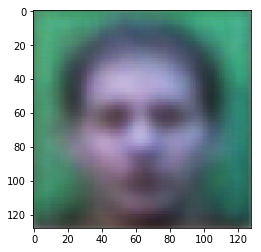

ep: 1 loss: 0.553020


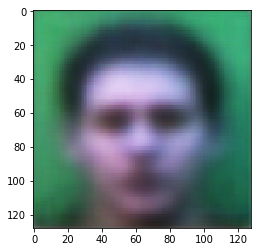

ep: 2 loss: 0.541141


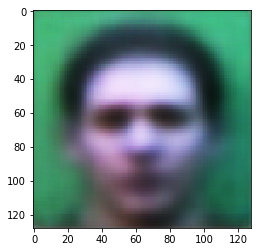

ep: 3 loss: 0.533078


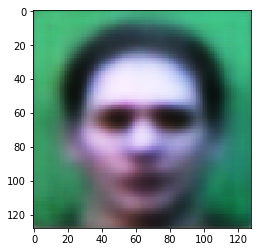

ep: 4 loss: 0.527814


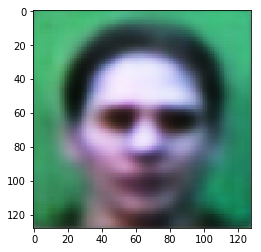

ep: 5 loss: 0.522840


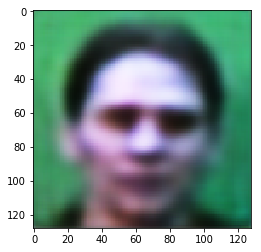

ep: 6 loss: 0.521895


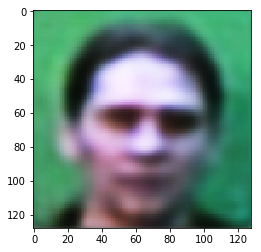

ep: 7 loss: 0.518153


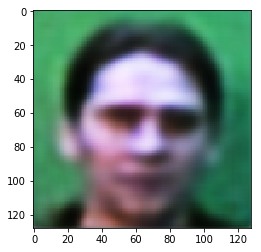

ep: 8 loss: 0.516887


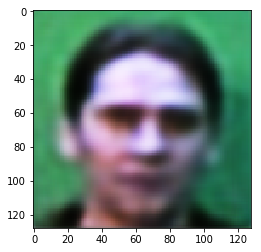

ep: 9 loss: 0.515261


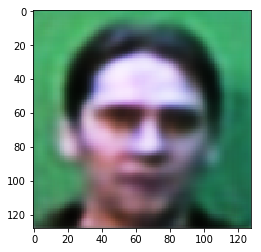

ep: 10 loss: 0.514362


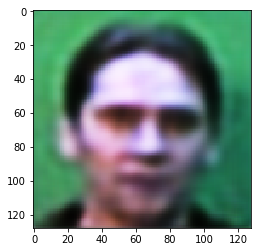

ep: 11 loss: 0.513640


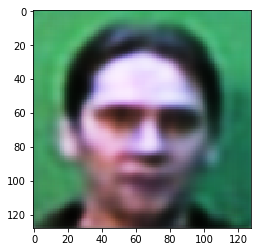

ep: 12 loss: 0.513073


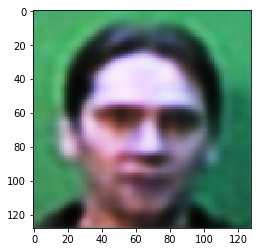

ep: 13 loss: 0.512626


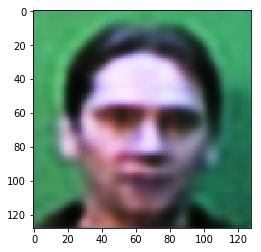

ep: 14 loss: 0.512277


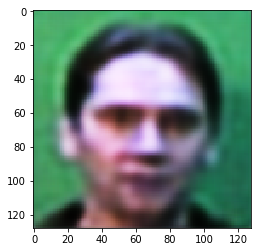

ep: 15 loss: 0.511932


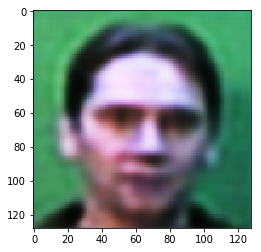

ep: 16 loss: 0.512147


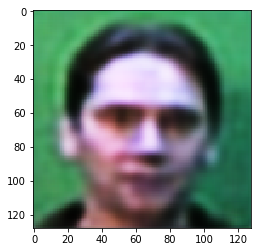

ep: 17 loss: 0.512055


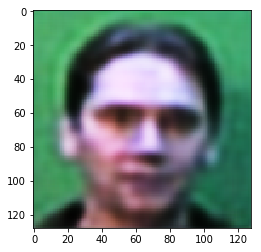

ep: 18 loss: 0.512263


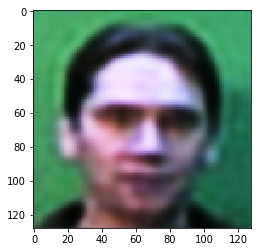

ep: 19 loss: 0.511743


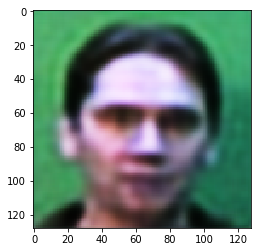

ep: 20 loss: 0.511423


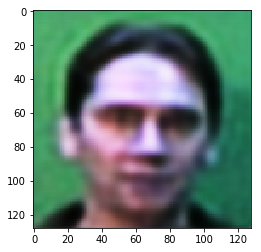

ep: 21 loss: 0.510958


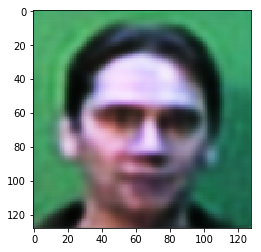

ep: 22 loss: 0.510704


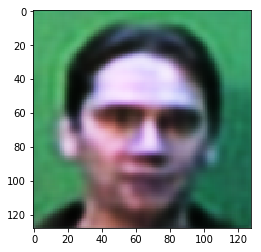

ep: 23 loss: 0.510842


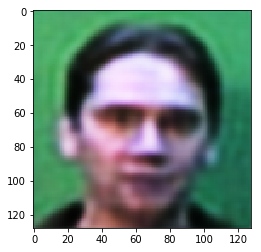

ep: 24 loss: 0.510739


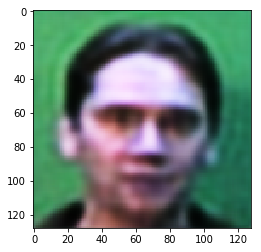

ep: 25 loss: 0.510592


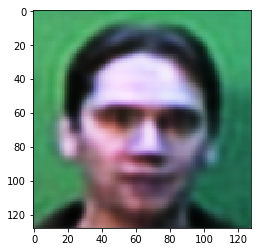

ep: 26 loss: 0.510372


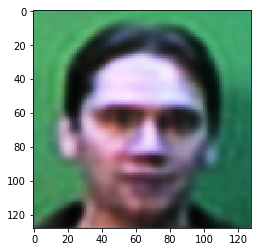

ep: 27 loss: 0.510223


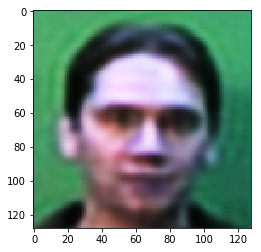

ep: 28 loss: 0.509977


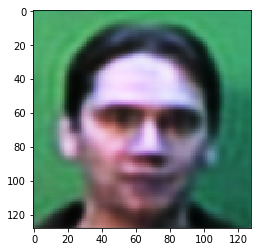

ep: 29 loss: 0.509938


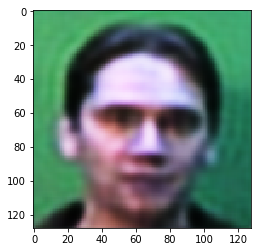

ep: 30 loss: 0.509879


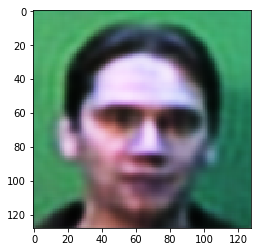

ep: 31 loss: 0.509992


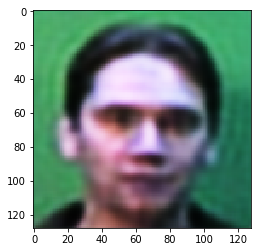

ep: 32 loss: 0.510161


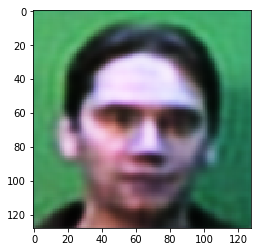

ep: 33 loss: 0.509647


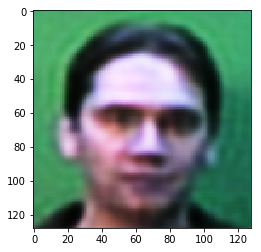

ep: 34 loss: 0.509623


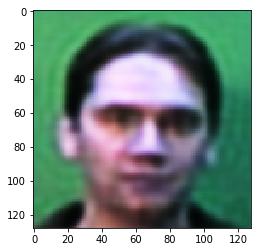

ep: 35 loss: 0.509641


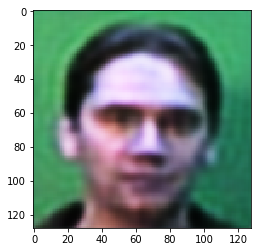

ep: 36 loss: 0.509705


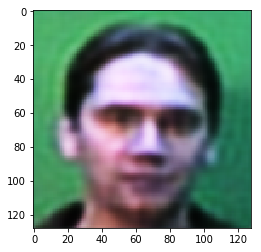

ep: 37 loss: 0.509734


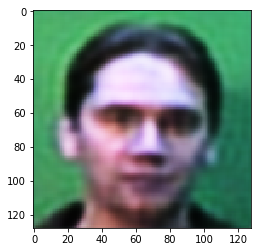

ep: 38 loss: 0.510262


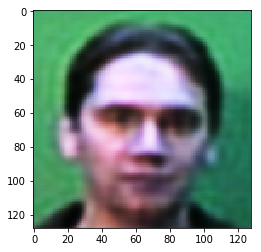

ep: 39 loss: 0.509886


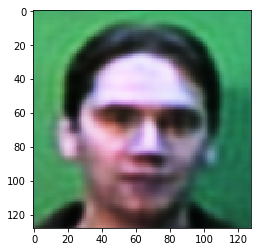

ep: 40 loss: 0.510339


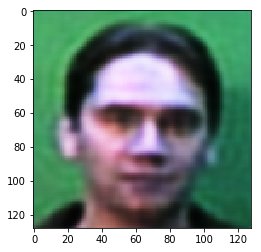

ep: 41 loss: 0.509132


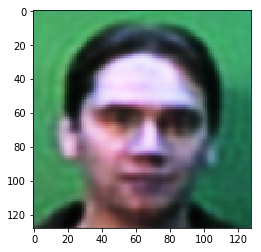

ep: 42 loss: 0.509046


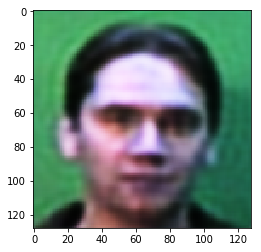

ep: 43 loss: 0.509041


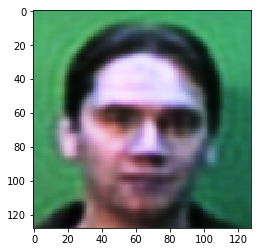

ep: 44 loss: 0.509044


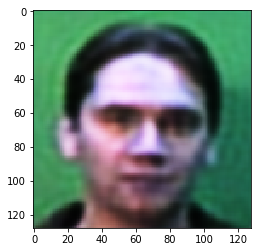

ep: 45 loss: 0.508952


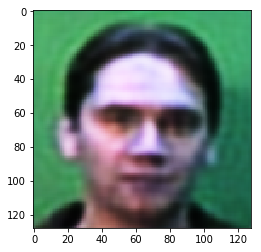

ep: 46 loss: 0.508864


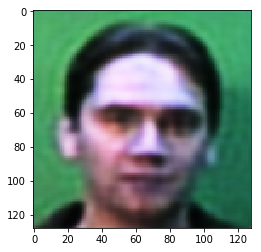

ep: 47 loss: 0.508802


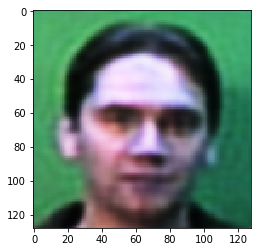

ep: 48 loss: 0.508800


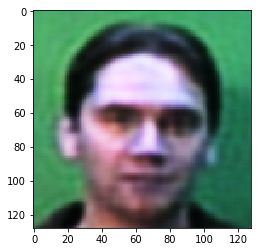

ep: 49 loss: 0.508999


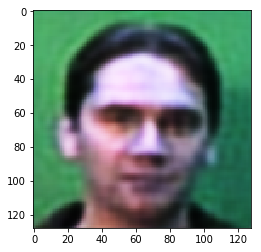

(3059, 128, 128, 3)


In [22]:
tf.reset_default_graph()
train()